# Mining MEDLINE with Python

MEDLINE is a bibliographic database of life sciences and biomedical information. The United States National Library of Medicine (NLM) at the National Institutes of Health maintains the database as part of the Entrez information retrieval system. MEDLINE is the primary database for biomedical and life sciences journal articles. It contains over 27 million citations from more than 5,600 scientific journals. 

### Required library

In [ ]:
#!pip install pymed

In [4]:
import pandas as pd
from pymed import PubMed
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Query to search for

Articles/Titles with keywords Covid-19, Booster, mRNA, or Vaccine from 2019 to present

In [2]:
query = 'Covid-19 OR Booster OR mRNA OR Vaccine AND 2019/01/01:2022/02/13[dp]'

In [2]:
def get_data(query, max_results, file_name, sample_frac):
    """
    This function takes a query and returns a dataframe with the results of the query.
    param: 
        query: a string that is the query to be run on PubMed
        max_results: an integer that is the maximum number of results to be returned
        file_name: a string that is the name of the file to be saved
        sample_frac: a float that is the fraction of the data to be sampled
    return:
        df: a dataframe with the results of the query
    """
    pubmed = PubMed(tool="MyTool", email="vineetver@hotmail.com")
    response = pubmed.query(query, max_results=max_results)

    article_list = []
    article_info = []

    for article in response:
        data = article.toDict()
        article_list.append(data)

    for article in article_list:
        article_info.append({
            u'title': article['title'],
            u'abstract': article['abstract'],
            u'Year': article['publication_date'],
        })
    
    articles = pd.DataFrame.from_dict(article_info)
    articles.dropna()
    articles = articles.sample(frac=sample_frac)
    articles.to_csv(file_name, index=False, header=True)


In [3]:
get_data(query, max_results=100, file_name='example.csv', sample_frac=0.1)

# Preprocessing
'Covid-19', 'Booster', 'mRNA', 'Vaccine'

In [5]:
keywords = ['Covid-19', 'Booster', 'mRNA', 'Vaccine']
df = pd.read_csv('data.csv')

try:                 
    df['Year'] = pd.to_datetime(df['Year'])     ## convert column 'Year' to datetime
    df['Year'] = df['Year'].dt.year             ## extract year from datetime
    df = df.dropna()                            ## drop rows with nan values
    df = df[df['Year'] > 2018]                  ## drop articles published before 2019
    for date in [2019, 2020, 2021, 2022]:       
        print(f'{date} contains {df[df["Year"] == date]["title"].count()} articles') 
         
    print('\n')
    for keyword in keywords:
        print(f'{keyword} is present in {df[df["title"].str.contains(keyword, flags=re.IGNORECASE)]["title"].count()} titles and {df[df["abstract"].str.contains(keyword, flags=re.IGNORECASE)]["abstract"].count()} articles')

except:
    print('Please run get_data() first')

df.head()

2019 contains 3862 articles
2020 contains 9384 articles
2021 contains 13244 articles
2022 contains 1550 articles


Covid-19 is present in 10148 titles and 13245 articles
Booster is present in 37 titles and 205 articles
mRNA is present in 675 titles and 5497 articles
Vaccine is present in 1838 titles and 4708 articles


,title,abstract,Year
1,COVID-19 Pneumonia: Three Thoracic Complicatio...,The most dreaded thoracic complications in pat...,2020
2,Epidemiological Features of the 2019 Novel Cor...,The fast-growing outbreak of the 2019 novel co...,2020
3,Impact of lockdown on COVID-19 epidemic in Île...,More than half of the global population is und...,2020
4,Nanomedicines for brain diseases: where we are...,Graphical abstract [Formula: see text].,2021
6,Localized surface plasmon resonance aptasensor...,"In this work, we designed and developed a meth...",2021


### Visualization

In [6]:
## make a column for each keyword and label it 1 if keyword is present in title or abstract else label it 0
for keyword in keywords:
        df[keyword] = df['title'].str.contains(keyword, flags=re.IGNORECASE) | df['abstract'].str.contains(keyword, flags=re.IGNORECASE)
        df[keyword] = df[keyword].astype(int)

In [7]:
## Count the number of articles for each keyword for every year
df_grouped = df.groupby('Year')[['Covid-19', 'Booster', 'mRNA', 'Vaccine']].agg(np.sum)
df_grouped.reset_index(['Year'], inplace=True)
df_grouped.head()

,Year,Covid-19,Booster,mRNA,Vaccine
0,2019,0,42,1704,1017
1,2020,4692,50,1749,1443
2,2021,8220,95,1917,2064
3,2022,985,27,239,301


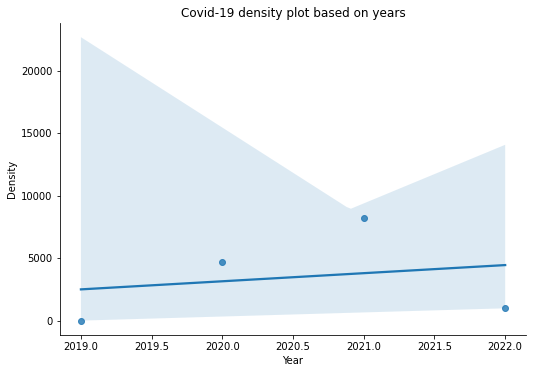

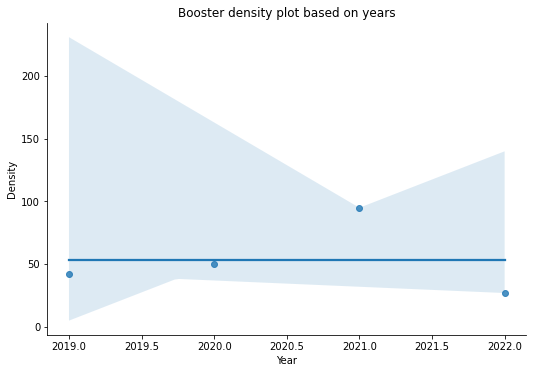

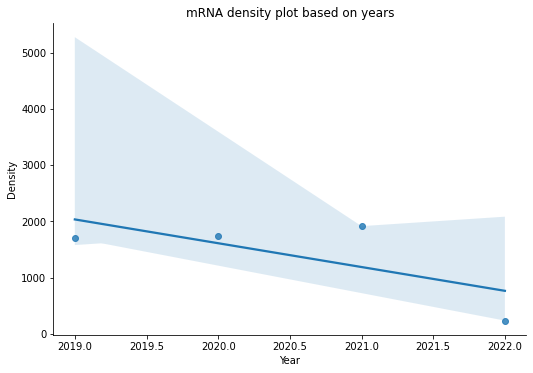

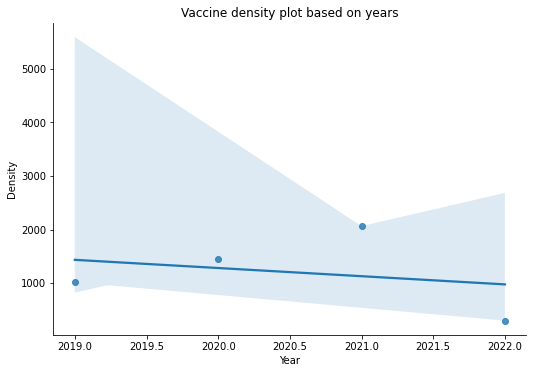

In [10]:
for keyword in keywords:
    sns.pairplot(df_grouped, x_vars=['Year'], y_vars=[keyword], height=5, aspect=1.5, kind='reg')
    plt.title(f'{keyword} density plot based on years')
    plt.xlabel('Year')
    plt.ylabel('Density')
    plt.show()


If we observe the above plots, Vaccine and booster have similar distributions.

#### Mining Keywords 'Obesity' and 'Cancer'



In [7]:
query = '((Obesity[Title/Abstract]) OR (Cancer[Title/Abstract])) AND (("2019/01/01"[Date - Create] : "3000"[Date - Create]))'

In [8]:
get_data(query, max_results=100, file_name='data2.csv', sample_frac=1)

NameError: name 'get_data' is not defined

### Preprocessing

In [11]:
keywords = ['Obesity', 'Cancer']
df = pd.read_csv('data2.csv')

try:                 
    df['Year'] = pd.to_datetime(df['Year'])     ## convert column 'Year' to datetime
    df['Year'] = df['Year'].dt.year             ## extract year from datetime
    df = df.dropna()                            ## drop rows with nan values
    df = df[df['Year'] > 2018]                  ## drop articles published before 2019
    for date in [2019, 2020, 2021, 2022]:       
        print(f'{date} contains {df[df["Year"] == date]["title"].count()} articles') 
         
    print('\n')
    for keyword in keywords:
        print(f'{keyword} is present in {df[df["title"].str.contains(keyword, flags=re.IGNORECASE)]["title"].count()} titles and {df[df["abstract"].str.contains(keyword, flags=re.IGNORECASE)]["abstract"].count()} articles')
except:
    print('Please run get_data() first')

df.head()

2019 contains 27 articles
2020 contains 80837 articles
2021 contains 155112 articles
2022 contains 19251 articles


Obesity is present in 9686 titles and 31112 articles
Cancer is present in 117546 titles and 197244 articles


,title,abstract,Year
0,Ultrasound Imaging Morphology is Associated wi...,Ultrasound (US) is commonly used for diagnosti...,2021
1,Yes-associated protein gene overexpression reg...,Yes-associated protein (YAP) has been reported...,2022
2,The tumor microenvironment in pancreatic ducta...,Pancreatic ductal adenocarcinoma (PDAC) is amo...,2021
3,CAR T-cell therapy for pleural mesothelioma: R...,The aim of adoptive T-cell therapy is to promo...,2021
5,MCL-1 gains occur with high frequency in lung ...,Evasion of programmed cell death represents a ...,2020


In [12]:
## make a column for each keyword and label it 1 if keyword is present in title or abstract else label it 0
for keyword in keywords:
        df[keyword] = df['title'].str.contains(keyword, flags=re.IGNORECASE) | df['abstract'].str.contains(keyword, flags=re.IGNORECASE)
        df[keyword] = df[keyword].astype(int)

df.head()

,title,abstract,Year,Obesity,Cancer
0,Ultrasound Imaging Morphology is Associated wi...,Ultrasound (US) is commonly used for diagnosti...,2021,0,1
1,Yes-associated protein gene overexpression reg...,Yes-associated protein (YAP) has been reported...,2022,0,1
2,The tumor microenvironment in pancreatic ducta...,Pancreatic ductal adenocarcinoma (PDAC) is amo...,2021,0,1
3,CAR T-cell therapy for pleural mesothelioma: R...,The aim of adoptive T-cell therapy is to promo...,2021,0,1
5,MCL-1 gains occur with high frequency in lung ...,Evasion of programmed cell death represents a ...,2020,0,1


In [13]:
df_grouped = df.groupby('Year')[['Obesity', 'Cancer']].agg(np.sum)
df_grouped.reset_index(['Year'], inplace=True)
df_grouped.head()

,Year,Obesity,Cancer
0,2019,1,24
1,2020,10239,64870
2,2021,19273,124754
3,2022,2316,15560


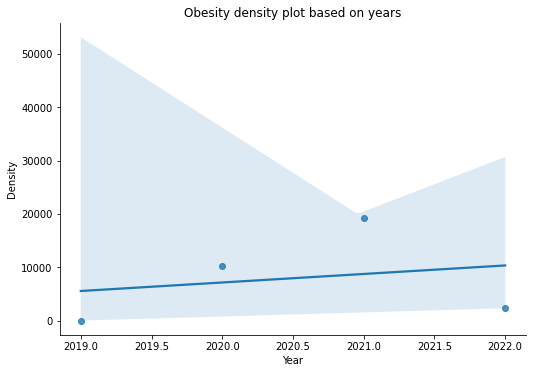

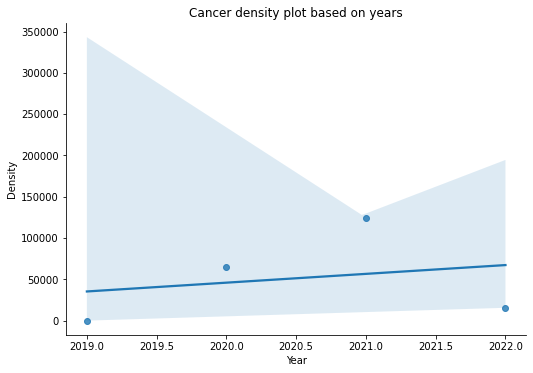

In [14]:
for keyword in keywords:
    sns.pairplot(df_grouped, x_vars=['Year'], y_vars=[keyword], height=5, aspect=1.5, kind='reg')
    plt.title(f'{keyword} density plot based on years')
    plt.xlabel('Year')
    plt.ylabel('Density')
    plt.show()

They have similar distribution

## Statistical Testing

### Student T
H0: the means of the samples are equal. <br>
H1: the means of the samples are unequal.

In [13]:
import scipy.stats as stats

stat, p = stats.ttest_ind(df_grouped['Obesity'], df_grouped['Cancer'])

print(f'Stats = {stat:.3}, p_value = {p:.3}')
if p > 0.05:
	print('The means of the samples are equal')
else:
	print('The means of the samples are not equal')

Stats = -1.52, p_value = 0.178
The means of the samples are equal


Student T assumes that the variables are normally distributed.

## Kruskal-Wallis H Test

H0: The distributions of the samples are equal. <br>
H1: the distributions of the samples are unequal.

In [52]:
stat, p  = stats.kruskal(df_grouped['Obesity'], df_grouped['Cancer'])

print(f'Stats = {stat:.3}, p_value = {p:.3}')
if p > 0.05:
	print('The distributions of the samples are equal')
else:
	print('The distributions of the samples are not equal')

Stats = 1.33, p_value = 0.248
The distributions of the samples are equal


## Mann-Whitney U Test

H0: The distributions of the samples are equal. <br>
H1: the distributions of the samples are unequal.


In [54]:
stat, p = stats.mannwhitneyu(df_grouped['Obesity'], df_grouped['Cancer'])

print(f'Stats = {stat:.3}, p_value = {p:.3}')
if p > 0.05:
    print('The distributions of the samples are equal')
else:
    print('The distributions of the samples are not equal')

Stats = 4.0, p_value = 0.343
The distributions of the samples are equal


Non-parametric tests confirm that the variables have the same distribution.

## Effect size (Cohan's d)

In [59]:
def cohen_d(x,y):
        cohens_d = (np.mean(x) - np.mean(y)) / (np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2))
        return cohens_d

cohen_d(df_grouped['Obesity'], df_grouped['Cancer'])

-1.243853638263998

Here, the sign of cohen's d effect tells the direction of effect. But a effect size of 0.9+ indicates very large effect size. So, the two variables are strongly related.

## Correlation Test (Pearson, Spearman, KendallTau)

In [66]:
pearsonr = stats.pearsonr(df_grouped['Obesity'], df_grouped['Cancer'])
print(f'Correlation between Obesity and Cancer by Pearsonr: {pearsonr[0]:.4}')

spearman = stats.spearmanr(df_grouped['Obesity'], df_grouped['Cancer'])
print(f'Correlation between Obesity and Cancer by Spearmanr: {spearman[0]:.4}')

kandall = stats.kendalltau(df_grouped['Obesity'], df_grouped['Cancer'])
print(f'Correlation between Obesity and Cancer by Kendall: {kandall[0]:.4}')

Correlation between Obesity and Cancer by Pearsonr: 0.9999
Correlation between Obesity and Cancer by Spearmanr: 1.0
Correlation between Obesity and Cancer by Kendall: 1.0


The correlation test confirms our finding, and we can conclude that Obesity and Cancer have an almost perfect correlation.